In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reviews_clear.csv', sep='^')
df.head()

,rt,review
0,plus,Everything was great. I was really happy stayi...
1,minus,I'm interested to see what the construction in...
2,plus,Location was good. Really good air conditioning.
3,minus,Room wasn’t clean. I found hair in the bed and...
4,plus,Room was beautifully decorated and over all ho...


In [3]:
df.shape

(10277, 2)

In [4]:
df = df.dropna().drop_duplicates()

In [5]:
df.shape

(9720, 2)

In [6]:
import re
from functools import partial
df.review = df.review.apply(partial(re.sub, '[^a-zA-Z1-9 ]', ' '))
df.review = df.review.apply(str.lower)

In [7]:
# сбор текстов плюсов/минусов
plus = ''
minus = ''
for i in range(df.shape[0]):
    if df.iloc[i, 0] == 'minus':
        minus += df.iloc[i, 1] + ' '
    elif df.iloc[i, 0] == 'plus':
        plus += df.iloc[i, 1] + ' '

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|[^\w\s]+')

In [9]:
plus_tokens = tokenizer.tokenize(plus)
minus_tokens = tokenizer.tokenize(minus)

In [10]:
from collections import Counter
from nltk.corpus import stopwords

In [11]:
plus_tokens = Counter(plus_tokens)
minus_tokens = Counter(minus_tokens)

In [12]:
for bad_word in stopwords.words('english'):
    plus_tokens.pop(bad_word, None)
    minus_tokens.pop(bad_word, None)

In [13]:
m_tokens = minus_tokens.most_common(1000)
m_tokens

[('room', 3121),
 ('hotel', 1208),
 ('check', 826),
 ('rooms', 611),
 ('like', 567),
 ('staff', 566),
 ('get', 559),
 ('would', 473),
 ('long', 453),
 ('stay', 444),
 ('time', 408),
 ('shower', 401),
 ('us', 387),
 ('one', 386),
 ('water', 386),
 ('pool', 381),
 ('mgm', 381),
 ('casino', 361),
 ('great', 358),
 ('night', 354),
 ('2', 348),
 ('service', 346),
 ('even', 337),
 ('could', 335),
 ('3', 332),
 ('bed', 316),
 ('day', 311),
 ('bathroom', 306),
 ('vegas', 297),
 ('food', 293),
 ('good', 292),
 ('everything', 290),
 ('also', 287),
 ('floor', 287),
 ('coffee', 287),
 ('clean', 286),
 ('1', 279),
 ('people', 276),
 ('view', 272),
 ('price', 272),
 ('got', 264),
 ('walk', 262),
 ('expensive', 260),
 ('parking', 252),
 ('really', 248),
 ('resort', 243),
 ('took', 242),
 ('small', 242),
 ('much', 237),
 ('strip', 236),
 ('booking', 231),
 ('fridge', 230),
 ('way', 229),
 ('location', 223),
 ('fee', 222),
 ('bad', 221),
 ('desk', 218),
 ('smoking', 214),
 ('nice', 214),
 ('front', 213

In [14]:
p_tokens = plus_tokens.most_common(1000)
p_tokens

[('room', 1092),
 ('great', 928),
 ('location', 879),
 ('hotel', 793),
 ('good', 705),
 ('staff', 677),
 ('nice', 551),
 ('clean', 441),
 ('pool', 419),
 ('comfortable', 409),
 ('strip', 363),
 ('rooms', 351),
 ('bed', 342),
 ('friendly', 293),
 ('everything', 273),
 ('casino', 258),
 ('restaurants', 250),
 ('excellent', 250),
 ('food', 229),
 ('check', 216),
 ('facilities', 216),
 ('stay', 213),
 ('mgm', 203),
 ('helpful', 201),
 ('vegas', 196),
 ('service', 183),
 ('amazing', 175),
 ('well', 157),
 ('really', 154),
 ('view', 150),
 ('area', 149),
 ('big', 148),
 ('easy', 145),
 ('loved', 138),
 ('place', 128),
 ('lots', 127),
 ('beds', 126),
 ('one', 119),
 ('liked', 119),
 ('like', 119),
 ('us', 117),
 ('also', 114),
 ('pools', 112),
 ('spacious', 111),
 ('time', 110),
 ('get', 109),
 ('free', 107),
 ('size', 103),
 ('close', 103),
 ('comfy', 102),
 ('price', 102),
 ('would', 101),
 ('large', 95),
 ('huge', 94),
 ('awesome', 91),
 ('best', 90),
 ('fantastic', 87),
 ('buffet', 87),
 

In [15]:
m_tokens = dict(m_tokens)
p_tokens = dict(p_tokens)
features = list(set(m_tokens).union(set(p_tokens)))
print(len(features))
features

1312


['nice',
 'total',
 'asked',
 'store',
 'actually',
 'forever',
 'entire',
 'wrong',
 'member',
 'dusty',
 'would',
 'show',
 'remove',
 'lounge',
 'super',
 'questions',
 'building',
 'enter',
 'curtain',
 'honeymoon',
 'customer',
 'clean',
 'conveniently',
 'make',
 '1',
 'put',
 'channels',
 'environment',
 'pleasant',
 'generally',
 'traffic',
 'earlier',
 'thought',
 'big',
 'games',
 'every',
 'wife',
 'cleaner',
 'leaked',
 'paid',
 'away',
 'closed',
 'noisy',
 'types',
 'pillows',
 'accommodate',
 'always',
 'horrible',
 'quite',
 'tv',
 'bit',
 'slow',
 'imagine',
 'little',
 'yelling',
 'dont',
 'open',
 'gone',
 'supposed',
 'receive',
 'otherwise',
 'reception',
 'located',
 'cirque',
 'curtains',
 'atmosphere',
 'valet',
 'pot',
 'decor',
 'calling',
 'case',
 '7',
 'construction',
 'w',
 'smaller',
 'shops',
 'water',
 'amount',
 'slippers',
 'drinking',
 'newer',
 'transportation',
 'comfortable',
 'tasty',
 'fresh',
 'fair',
 'staying',
 'stop',
 'corridor',
 'fell',


In [16]:
import numpy as np

In [17]:
def transform_data(df_, features):
    res_x = np.zeros((df_.shape[0], len(features)))
    res_y = np.empty(df_.shape[0], dtype=np.int32)
    for i in range(res_x.shape[0]):
        if df_.iloc[i, 0] == 'plus':
            res_y[i] = 1
        elif df_.iloc[i, 0] == 'minus':
            res_y[i] = 0
        tmp = Counter(tokenizer.tokenize(df_.iloc[i, 1]))
        for token in tmp.keys():
            try:
                ind = features.index(token)
            except ValueError:
                continue
            res_x[i, ind] = tmp[token]
    return res_x, res_y

In [18]:
X, y = transform_data(df, features)

In [19]:
def get_delta_tf_idf_weights(X_, y_):
    weights = np.empty(X_.shape[1])
    base_freq = (y_ == 0).sum() / (y_ == 1).sum()
    mx = np.log(y_.size)
    mn = np.log(1 / y_.size)
    tmp_1 = X_[y_ == 1].sum(axis=0)
    tmp_0 = X_[y_ == 0].sum(axis=0)
    weights[tmp_1 == 0] = mn
    weights[tmp_0 == 0] = mx
    mask = np.logical_and(tmp_1 != 0, tmp_0 != 0)
    weights[mask] = np.log(base_freq * tmp_1[mask] / tmp_0[mask])
    return weights

In [20]:
weights = get_delta_tf_idf_weights(X, y)
X_weighted = X * weights

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [22]:
model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('main', LogisticRegression())
    ]
)

In [23]:
cross_val_score(model, X, y).mean()

0.7527777777777778

In [24]:
cross_val_score(model, X_weighted, y).mean()

0.7527777777777778

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_weighted, y)

roc-auc

In [26]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('main', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

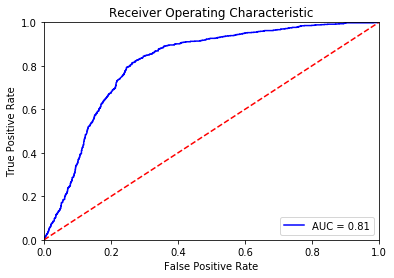

In [27]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Это функция, которая применяет модель к тексту, выдаёт вероятность "положительности" и "отрицательности" текста, 
можно использовать для оценки произвольного текста об отеле.



In [28]:
def text_rate(model, text, features):
    res_x = np.zeros(len(features))
    tmp = Counter(tokenizer.tokenize(text))
    for token in tmp.keys():
        try:
            ind = features.index(token)
        except ValueError:
            continue
        res_x[ind] = tmp[token]
    return model.predict_proba(res_x.reshape(1, -1))

svm

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [35]:
model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('main', SVC(probability=True, C=5))
    ]
)

In [30]:
cross_val_score(model, X_weighted, y).mean()

0.7803497942386831

In [32]:
cross_val_score(model, X, y).mean()

0.7803497942386831

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_weighted, y)

grid search

In [32]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 5]}
clf = GridSearchCV(SVC(), parameters)

In [33]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
clf.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

roc-auc

In [36]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('main', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

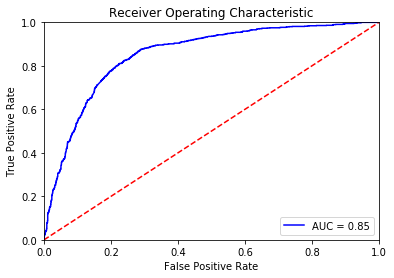

In [37]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('main', RandomForestClassifier(min_samples_split=200, n_estimators=200))
    ]
)

In [90]:
cross_val_score(model, X_weighted, y).mean()

0.8058641975308642

In [91]:
cross_val_score(model, X, y).mean()

0.8057613168724279

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_weighted, y)

In [93]:
parameters = {'min_samples_split':[2, 200], 'n_estimators':[1, 200]}
clf = GridSearchCV(RandomForestClassifier(), parameters)

In [80]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 200], 'n_estimators': [1, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('main', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
    ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

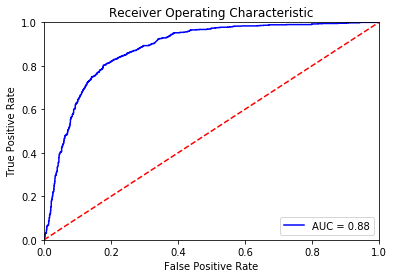

In [95]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

В отзывах слишком мало текста, из-за этого домножение на веса слабо влияет на качество, в случайном лесе было, что на взвешенном хуже с некоторыми параметрами.
LogReg оптимально работает при 225 признаках-словах, svc не даёт значительного улучшения в этом случае, при большем числе признаков качество LogReg значительно ухудшается, svc не так значительно. Лес работает лучше svc, я параметры мало подбирал, grid search долго работает.
Надо добавить признаки - биграммы слов и потестить word2vec, мб ещё параметры поподбирать. Возможно спарсить текстов с других текстов, и посмотреть как на них модель работает